<img src='http://www-scf.usc.edu/~ghasemig/images/sharif.png' alt="SUT logo" width=300 height=300 align=left class="saturate" >

<br>
<font>
<div dir=ltr align=center>
<font color=0F5298 size=7>
    Artificial Intelligence <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
    Fall 2023<br>
<font color=3C99D size=5>
    Practical Assignment 1 - Simulated Annealing <br>
<font color=696880 size=4>
    Reza Soumi, Rouzbeh Pirayadi, Amir Mohammad Izadi

____

# Personal Data

In [86]:
# Set your student number
student_number = '4001050903'
Name = 'mohamad moeen'
Last_Name = 'samadi azad'

# Rules
- Make sure that all of your cells can be run perfectly. 

# Q2: DNA Center Point (100 Points)

<font size=4>
Author: Rouzbeh Pirayadi
			<br/>
                <font color=red>
Please run all the cells.
     </font>
</font>
                <br/>
    </div>

## Libraries

In [9]:
import random
import numpy as np
import matplotlib.pyplot as plt
import time

Alphabet = np.array(['a', 'c', 'g', 't'])

## Problem Definition

DNA is composed of four nucleic-acid bases. namely A, C, G and T. We consider DNA as a string from these four characters. In this exercise we want to find the center of a group of DNAs. In order to define center we need to first define distance between two DNAs (strings). Note that DNAs have the same length, so their distsance could be defined as:
$$
dist(a, b) = \sum_{a[i] \neq b[i]} 1
$$
for example the distance between the below DNAs is two since they are different in two indecies.
$$
AGGCT
$$
$$
ACGCA
$$

Now we can define the center of a set of DNAs as follows.
$$
center(S) = \arg \min_{a}{\{\max_{i \in S}{\{dist(a, i)}\}\}}
$$
In other words center of a set of DNAs is a DNA which its distance from the furthest DNA in the set is the least. Below is an example.

$$
center(\{ACCT, AGCG, ACTG\}) = \{ACCG\}
$$

Note that center is not necassarily unique. Look at the below case for instance.

$$
center(\{AA, AC, AG\}) = \{AA, AC, AG, AT\}
$$

However the maximum distance of the center is unique. We call this value the radius of the set.

$$
radius(S) = \min_{a}{\{\max_{i \in S}{\{dist(a, i)}\}\}}
$$
$$
radius(\{AA, AC, AG\}) = 1
$$

Our goal is to find the center and the radius utilizing __simulated annealing__.

## Initializing States

First we must model our problem, so we will be able to solve it. Our solution is a string with the same length as the objects in $S$. In order to represent the solutions which are the states in our problem, we use a numpy array of characters.

In [10]:
def initialize_state(n):
    ##################################################################
    # (5 Points)                                                     #
    # [inputs]                                                       #
    # length of the vector                                           #
    # [outputs]                                                      #
    # returns a random vector with length n and                      #
    # uniform probability from Alphabet elements as a numpy array    #
    ##################################################################
    return np.random.choice(Alphabet,n)


## Evaluation Function

We want to start from a state(solution) and try minimizing the distance. In other words the outer minimization of the center formula will be done by simulated annealing so the inner maximization must be done by the evaluation function. As a result the evaluation function , represented by e, is as follows.

$$
f(a) = \max_{i \in S}{dist(a, i)}
$$

In [11]:
def calculate_evaluation(genomes, state):
    ##################################################################
    # (10 Points)                                                    #
    # [inputs]                                                       #
    # genomes is a 2D numpy array and represents the set of DNAs     #
    # state is a 1D numpy array which represents "a" in the equation #
    # [outputs]                                                      #
    # the function returns the value of f(a)                         #
    ##################################################################
    max = 0
    for genome in genomes:
        if np.sum(genome != state)> max:
            max = np.sum(genome != state)
    return max

## Neighboring State

In each iteration of __simulatd annealing__ a neighboring state of the current state is accessed. So we need to define neighboring states. Two states are neighbors if they are exactly different at one index.

$$
(a, b) \in N \iff \exists i: a[i] \neq b[i] \land \forall j \neq i: a[j] = b[j]
$$

for example the following states are neighbors.

$$
ACGCT
$$
$$
ACTCT
$$

In [12]:
def get_neighbor_state(state):
    ##################################################################
    # (15 Points)                                                    #
    # [inputs]                                                       #
    # state is a 1D numpy array which represents a state             #
    # [outputs]                                                      #
    # a neighboring state of input is returned                       #
    # [notice]                                                       #
    # note the the same state as the input should not be returned    #
    # and the neighbor should be selected uniformly at random        #
    ##################################################################
    state_cp = np.copy(state)
    x = np.random.choice(state_cp.size)
    valid_value  = np.where(Alphabet != state_cp[x])[0]
    state_cp[x]  = np.random.choice(Alphabet[valid_value])
    return state_cp


## Temperature and Acceptance Probability

After implementing all the prerequisites we are now able to implement the main algorithm. Consider 
$a_1$ and $a_2$ as the current and new states. The acceptance probability would be as follows.
$$
P(a_1, a_2)= 
\begin{cases}
    1 & f(a_2) < f(a_1) \\
    e ^ {-\frac{(f(a_2) - f(a_2))}{T}} & o.w. \\
\end{cases}
$$
In the above equation T is temperature and changes as below where $i$ is the iteration number.

$$
T = T_0 \times \alpha^i
$$

Now complete the below function according to the comment about input and outputs.

In [33]:
def simulated_annealing(genomes, initial_state, alpha, initial_temp, max_iteration, min_temperature):
    ##############################################################################
    # (35 Points)                                                                #
    # [inputs]                                                                   #
    # genomes is a 2D numpy array and represents the set of DNAs                 #
    # initial state is the state to start with                                   #
    # alpha is the temperature decay rate                                        #
    # initial temp is T0                                                         #
    # max_iteration is the maximum number of iteration (termination condition)   #
    # min_temperature is the minimum temperature (termination condition)         #
    # [outputs]                                                                  #
    # best state found as a numpy array                                          #
    # best state's evaluation value                                              #
    # all the evaluations of current state as a normal list                      #
    ##############################################################################
    curr_state = initial_state
    i = 0
    temperature = initial_temp
    evaluations = []
    best_state = None
    best_value = float('INF')
    curr_value = calculate_evaluation(genomes,curr_state)
    while i < max_iteration and temperature > min_temperature:
        next_state = get_neighbor_state(curr_state) 
        next_value = calculate_evaluation(genomes, next_state)
        if next_value < curr_value or np.random.choice([True, False], p=[np.exp((curr_value - next_value) / temperature), 1-np.exp((curr_value - next_value) / temperature)]):
            curr_state = next_state
            curr_value = next_value 
        if curr_value < best_value:
            best_value = curr_value  
            best_state = curr_state  
        i += 1
        temperature *= alpha  
        evaluations.append(curr_value)


   
            
    return best_state, best_value, evaluations              


    ################################################################################
    ####################################complete####################################
    ################################################################################


## Validate

In order to validate our implementation of simulated annealing, we implement a naive way to solve the problem. This algorithm traverses all possible sequences and calculates the solution. Note that your implementation of "calculate_evaluation" needs to be correct for this algorithm to work correctly.

In [14]:
##############################################
# no need to the any thing                   #
##############################################

def go_to_next(number, alphabet_length):
    idx = len(number) - 1
    while idx >= 0:
        if number[idx] < alphabet_length - 1:
            number[idx] += 1
            return True
        else:
            number[idx] = 0
            idx -= 1
    return False


def brute_force(genomes):
    n = len(genomes[0])
    curr_state_index = np.zeros(n).astype(int)
    best_state = None
    best_value = float('INF')

    while True:
        new_result = calculate_evaluation(genomes, Alphabet[curr_state_index])

        if new_result < best_value:
            best_value = new_result
            best_state = Alphabet[curr_state_index]

        if not go_to_next(curr_state_index, len(Alphabet)):
            break

    return best_state, best_value


Run the cell below to compare your algorithm with brute force. your answers should be close to the results acheived from brute force (10 points).

In [17]:
genomes_array = np.array([
                        [['g', 'c', 'a', 't', 'c'],
                         ['g', 'a', 'c', 't', 'c'],
                         ['c', 'a', 'c', 'g', 'c']],
                         [['a', 'c', 'g', 'g', 'g', 'a', 'c'],
                          ['a', 'g', 'g', 'c', 'g', 'a', 'g'],
                          ['c', 'g', 'g', 'g', 'g', 't', 'c']],
                        [['c', 'c', 'a', 'c', 't', 'a', 'g', 'c', 'a'],
                         ['c', 't', 'a', 'g', 't', 'c', 't', 'c', 't'],
                         ['c', 't', 'c', 'c', 't', 'c', 'c', 'c', 'g']]], dtype=object)

for genomes in genomes_array:
    initial_state = initialize_state(len(genomes[0]))
    start_time_sa = time.time()
    result_dna_sa, result_value_sa, _ = simulated_annealing(genomes, initial_state, 0.9, 500, 1000, 1e-3)
    middle_time = time.time()
    result_dna_bf, result_value_bf = brute_force(genomes)
    end_time_bf = time.time()

    print(f'Simulated Annealing found solution {result_dna_sa} with value {result_value_sa} in %.3f milliseconds' %((middle_time - start_time_sa) * 1000))
    print(f'Brute Force         found solution {result_dna_bf} with value {result_value_bf} in %.3f milliseconds' %((end_time_bf - middle_time) * 1000))



Simulated Annealing found solution ['g' 'a' 'c' 't' 'c'] with value 2 in 20.298 milliseconds
Brute Force         found solution ['c' 'a' 'a' 't' 'c'] with value 2 in 59.545 milliseconds
Simulated Annealing found solution ['a' 'g' 'g' 'g' 'g' 'a' 'c'] with value 2 in 18.200 milliseconds
Brute Force         found solution ['a' 'g' 'g' 'g' 'g' 'a' 'c'] with value 2 in 798.570 milliseconds
Simulated Annealing found solution ['c' 't' 'a' 'c' 't' 'c' 'g' 'c' 't'] with value 3 in 17.226 milliseconds
Brute Force         found solution ['c' 'c' 'a' 'c' 't' 'c' 'c' 'c' 't'] with value 3 in 10951.114 milliseconds


According to the above results, what do you think is the advantage of simulated annealing over brute force (5 points)?
همانطور که واضح است، سرعت آن بسیار بیشتر است، زیرا به جای جست و جوی همه حالات، سعی میکند جوابی نزدیک جواب فعلی و احتمالا بهتر برگزیند. 

<font color='cyan'>

Provide your answer.

</font>


## Results

Run the below cells to see the results (10 points).

In [35]:
def  draw_results(evaluations):
    ##############################################
    # no need to the any thing                   #
    ##############################################
    plt.plot(evaluations)
    plt.title('Simulated Annealing algorithm')
    plt.ylabel('value')
    plt.xlabel('iteration')
    plt.show()

In [36]:
example_genomes = np.array([['c', 'c', 'a', 'c', 't', 'a', 'g', 'g', 'a'],
                            ['c', 't', 'a', 'g', 't', 'c', 't', 'g', 'a'],
                            ['c', 't', 'c', 'c', 't', 'c', 'c', 'g', 'a']])
initial_state = initialize_state(len(example_genomes[0]))

results: ['c' 't' 'a' 'c' 't' 'c' 'g' 'g' 'a'] and  radius: 2


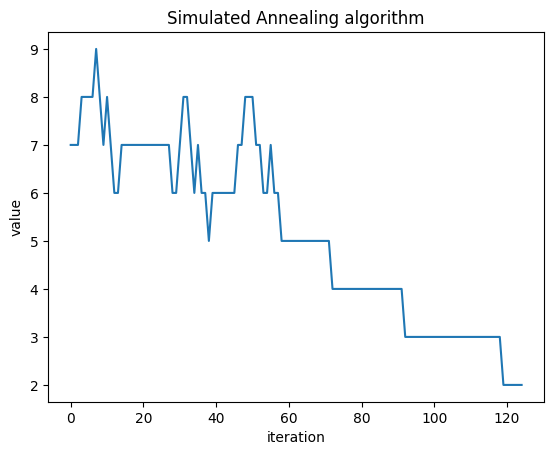

In [37]:
result_dna, result_value, evaluations = simulated_annealing(example_genomes, initial_state, 0.9, 500, 1000, 1e-3)
print(f'results: {result_dna} and  radius: {result_value}')
draw_results(evaluations)


results: ['c' 't' 'a' 'c' 't' 'c' 'c' 'g' 'a'] and  radius: 3


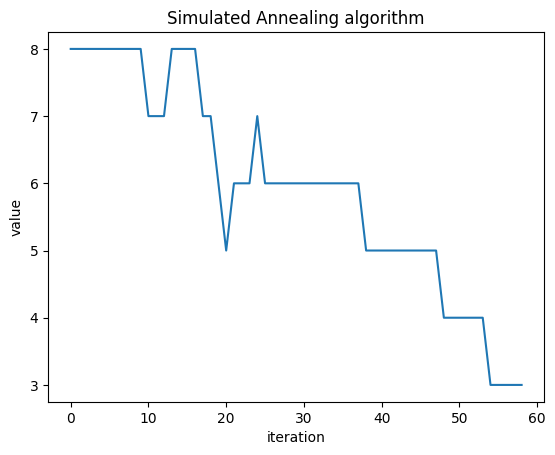

In [40]:

result_dna, result_value, evaluations = simulated_annealing(example_genomes, initial_state, 0.8, 500, 1000, 1e-3)
print(f'results: {result_dna} and  radius: {result_value}')
draw_results(evaluations)


results: ['c' 't' 'a' 'c' 't' 'c' 'g' 'g' 'a'] and  radius: 2


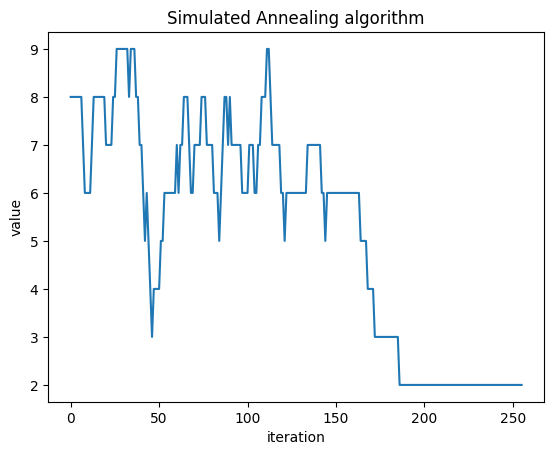

In [41]:
result_dna, result_value, evaluations = simulated_annealing(example_genomes, initial_state, 0.95, 500, 1000, 1e-3)
print(f'results: {result_dna} and  radius: {result_value}')
draw_results(evaluations)


Now compare the diagrams for different values of alpha and analyze their shapes (10 points).

<font color='cyan'>

Provide your analysis.

</font>

با توجه به نمودار ها، و نتیجه به دست آمده، میتوان دید که وقتی آلفا را نزدیک تر به یک تعیین میکنیم ، تابع دما با سرعت کمتری نزول می کند، و در نتیجه فرصت جست و جو های بیشتر در محل های دور از لوکال مینیمم وجود دارد، و گزینه های بیشتری بررسی می شوند. در این حالت احتمال به دست آمدن جواب بهینه بیشتر است . اگر آلفا کم انتخاب شود، الگوریتم شبیه هیل کلیامینگ می شود و فقط سمت نقاط بالاتر می رود که احتمال قفل شدن در لوکال مینیم زیاد می شود. نتایج هم با این توضیحات هم خوانند، وقتی آلفا را 0.8 تعیین کردیم، جواب 3 بهترین استیت دیده شده است که احتمالا یک لوکال مینیمم است، در صورتی که با آلفای بیشتر ، جواب 2 که بهتر است به دست آمده است.
 